In [13]:
import re
import os
import nltk
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import reuters
import collections
from transformers import pipeline

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
news_df = pd.read_pickle("C:/Users/rparg/Documents/Data/Reuters/news_df.pkl")
class_con_df = pd.read_pickle("C:/Users/rparg/Documents/Data/Reuters/con_cat.pkl")

<IPython.core.display.Javascript object>

In [3]:
new_cats = [
    "acuisition",
    "aluminum",
    "bottom of the pyramid",
    "barley",
    "castor oil",
    "carcass",
    "cattle",
    "cocoa",
    "coconut",
    "coconut oil",
    "coffee",
    "consumer price index",
    "copper",
    "copra cake",
    "corn",
    "cotton",
    "computershare",
    "crude",
    "deutsche fussball liga",
    "digital realty trust",
    "dravida munnetra kazhagam",
    "ellington residential mortgage reit stock",
    "fuel",
    "gas",
    "gold",
    "grain",
    "groundnut",
    "ground nut oil",
    "grupo nacional provincial",
    "heat",
    "hog",
    "housing",
    "income",
    "instalco intressenter debt",
    "interest",
    "intrepid potash",
    "iron steel",
    "jet",
    "jobs",
    "lead",
    "leading economic index",
    "linseed oil",
    "livestock",
    "lumber",
    "meal feed",
    "money foreign exchange",
    "money supply",
    "natural gas",
    "naphtha",
    "nickel",
    "nokia",
    "new zealand dollar",
    "oat",
    "orange",
    "palladium",
    "palm oil",
    "palm kernel",
    "petronas chemicals",
    "platinum",
    "potato",
    "propane",
    "rand",
    "rapeseed",
    "rapeseed oil",
    "reserves",
    "retail",
    "rice",
    "rubber",
    "rye",
    "ship",
    "silver",
    "sorghum",
    "soybean",
    "soy meal",
    "soy oil",
    "strategic metal",
    "sugar",
    "sunflower meal",
    "sunflower oil",
    "sunflower seed",
    "tea",
    "tin",
    "trade",
    "vagetable oil",
    "waterfront philippines",
    "wheat",
    "yen",
    "zinc",
]

<IPython.core.display.Javascript object>

In [4]:
cat_dict = {
    "acq": "acuisition",
    "alum": "aluminum",
    "bop": "bottom of the pyramid",
    "castor-oil": "castor oil",
    "carcass": "livestock",
    "cpu": "computershare",
    "coconut-oil": "coconut oil",
    "copra-cake": "copra cake",
    "cpi": "consumer price index",
    "dfl": "deutsche fussball liga",
    "dlr": "digital realty trust",
    "dmk": "dravida munnetra kazhagam",
    "earn": "ellington residential mortgage reit stock",
    "gnp": "grupo nacional provincial",
    "groundnut-oil": "ground nut oil",
    "instal-debt": "instalco intressenter debt",
    "ipi": "intrepid potash",
    "iron-steel": "iron steel",
    "l-cattle": "cattle",
    "lei": "leading economic index",
    "lin-oil": "linseed oil",
    "meal-feed": "meal feed",
    "money-fx": "money foreign exchange",
    "money-supply": "money supply",
    "nat-gas": "natural gas",
    "nkr": "nokia",
    "palm-oil": "palm oil",
    "palmkernel": "palm kernel",
    "pet-chem": "petronas chemicals",
    "rape-oil": "rapeseed oil",
    "soy-meal": "soy meal",
    "soy-oil": "soy oil",
    "strategic-metal": "strategic metal",
    "sun-meal": "sunflower meal",
    "sun-oil": "sunflower oil",
    "sunseed": "sunflower seed",
    "veg-oil": "vagetable oil",
    "wpi": "waterfront philippines",
}

<IPython.core.display.Javascript object>

In [6]:
pred_con_df = pd.merge(
    class_con_df, news_df, left_on="sequence", right_on="content", how="inner"
)

<IPython.core.display.Javascript object>

In [7]:
pred_con_df["predicted"] = pred_con_df["labels"].apply(lambda x: x[0])

<IPython.core.display.Javascript object>

In [8]:
pred_con_df["actual"] = pred_con_df["top_label"].apply(
    lambda x: cat_dict[x] if x in cat_dict.keys() else x
)

<IPython.core.display.Javascript object>

In [9]:
print(
    sklearn.metrics.classification_report(
        y_true=pred_con_df["actual"], y_pred=pred_con_df["predicted"], zero_division=1
    )
)

                                           precision    recall  f1-score   support

                               acuisition       0.67      0.50      0.57         4
                                 aluminum       1.00      1.00      1.00         4
                                   barley       1.00      0.25      0.40         4
                    bottom of the pyramid       0.00      0.00      0.00         5
                               castor oil       1.00      1.00      1.00         1
                                   cattle       0.00      0.00      0.00         1
                                    cocoa       1.00      1.00      1.00         4
                                  coconut       0.33      0.33      0.33         3
                              coconut oil       0.50      1.00      0.67         1
                                   coffee       1.00      0.75      0.86         4
                            computershare       1.00      0.00      0.00         1
   

<IPython.core.display.Javascript object>

In [10]:
cf_matrix = sklearn.metrics.confusion_matrix(
    y_true=pred_con_df["actual"], y_pred=pred_con_df["predicted"]
)

<IPython.core.display.Javascript object>

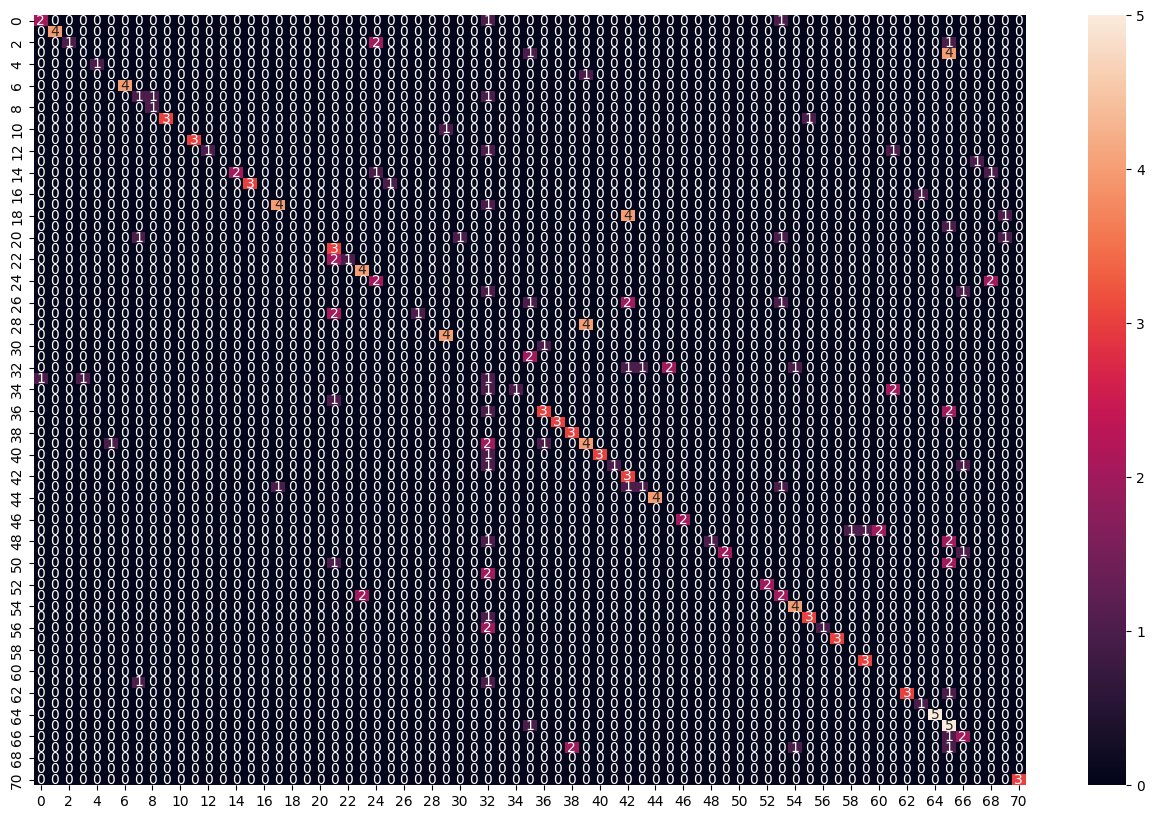

<IPython.core.display.Javascript object>

In [14]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(cf_matrix, ax=ax, annot=True)
plt.show()